In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/mnt/data4/Abhishek/VPF/random/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
fid_data = []
random_data = []

#for filename in os.listdir(path):
#    if filename.startswith('vpf_MDgalaxies'):
#        _,vpf = np.load(os.path.join(path,filename))
#        _temp = np.concatenate((vpf,f[0]))
#        fid_data.append(_temp)


for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        random_data.append(_temp)


In [8]:
full_data = np.vstack((random_data))
del random_data
del fid_data
np.random.shuffle(full_data)

In [9]:
X_data = pd.DataFrame(full_data[:,:-5])
y_data = pd.DataFrame(full_data[:,-5:])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [11]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [12]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([0.00334003, 0.0033398 , 0.00301578, 0.05094804, 0.01259617])

In [13]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

0   -0.027967
1   -0.009907
2   -0.033069
3    4.275075
4    1.296152
dtype: float64


In [14]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [15]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [16]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.081363,13.992785,0.886446,0.917768,0.986512,13.139023,14.064625,0.944276,1.103802,0.914663
1,13.078526,14.027708,0.848887,0.763595,0.886694,13.045492,14.055105,0.821822,1.191048,0.890657
2,13.050166,13.998914,1.065597,1.269873,0.723394,13.072052,14.063754,1.089970,1.124739,0.879811
3,12.973817,13.987839,0.839203,1.223112,0.875576,13.047733,14.049622,0.908536,1.137929,0.898045
4,13.138028,14.121170,0.853593,1.132252,0.871075,13.153173,14.070885,0.866616,1.133637,0.927849
...,...,...,...,...,...,...,...,...,...,...
995,12.989666,13.973056,1.151187,0.865376,0.760696,13.002649,14.071610,1.164372,1.101222,0.916840
996,13.069612,14.074845,1.011750,0.818901,0.874880,13.090532,14.066507,1.030556,1.132913,0.913966
997,13.141174,13.987006,1.166285,1.085341,1.093978,13.073782,14.060359,1.098065,1.131418,0.900602
998,13.086067,14.055943,1.106535,0.949926,0.850590,13.104822,14.057054,1.128378,1.126386,0.898330


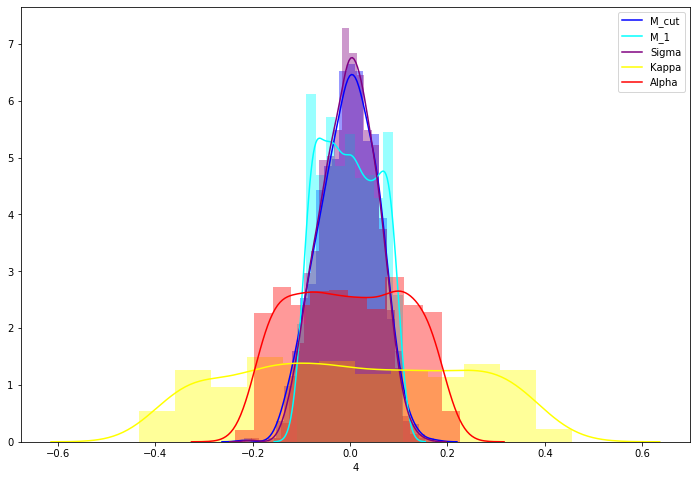

In [17]:
plot_error(y_rf,y_test)

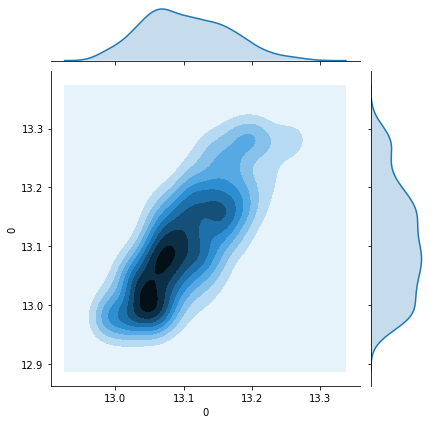

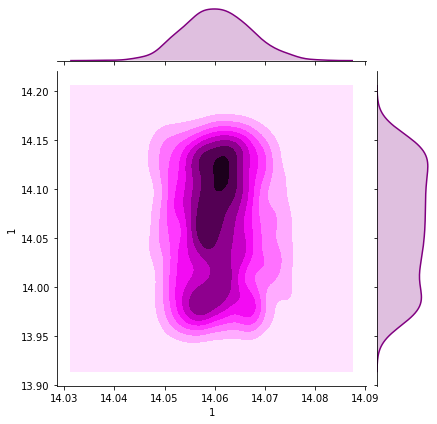

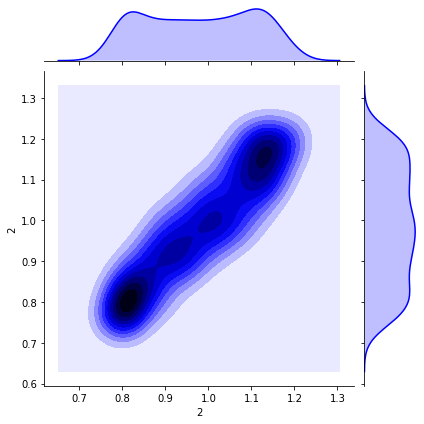

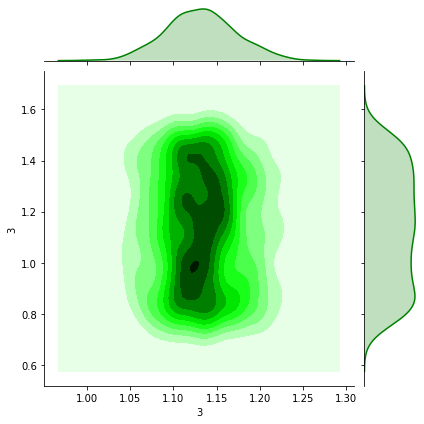

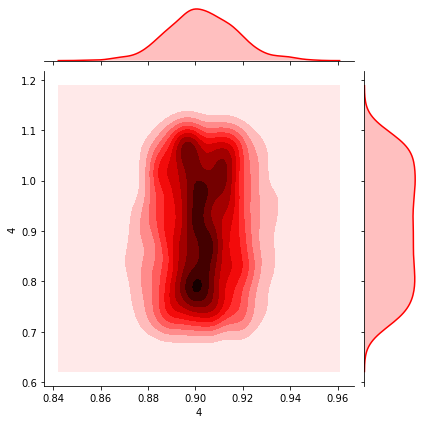

In [18]:
plot_corr(y_rf,y_test)

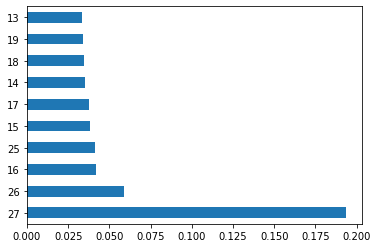

In [19]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [20]:
feat_importances.nlargest(10)

27    0.193465
26    0.058621
16    0.041641
25    0.041512
15    0.038347
17    0.037506
14    0.035046
18    0.034692
19    0.034186
13    0.033636
dtype: float64

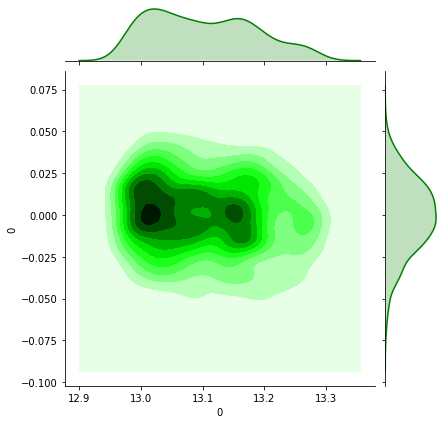

In [20]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

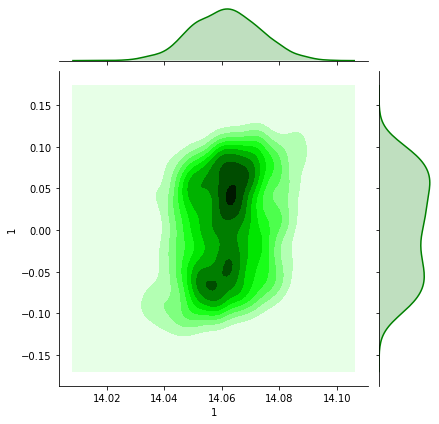

In [21]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

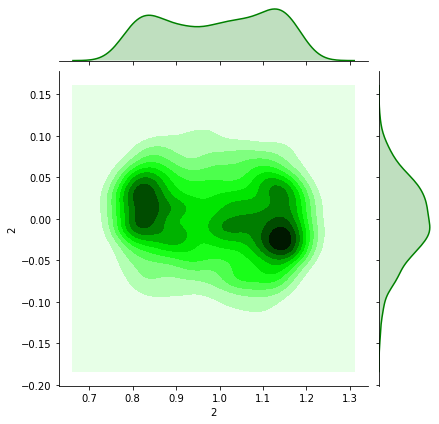

In [22]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

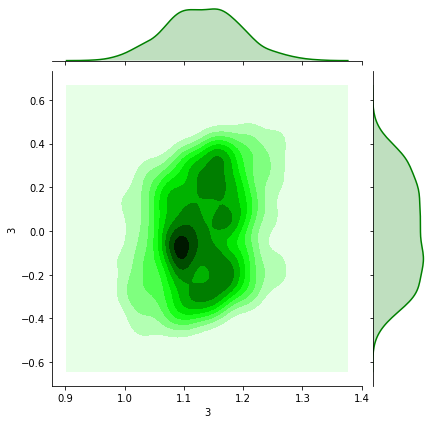

In [23]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

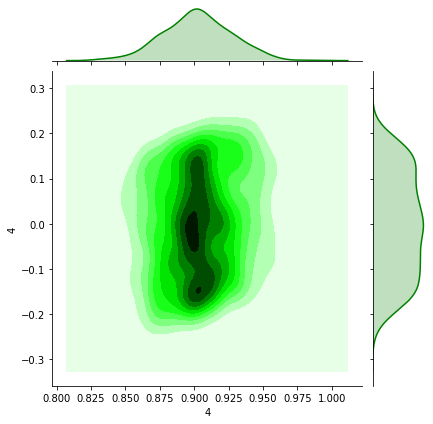

In [24]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [21]:

max_depth = 40
n_estimators = 250

In [ ]:
'''
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
     """Return the average MAE over 5 CV folds of random forest model.
    
     Keyword argument:
     n_estimators -- the number of trees in the forest
     """
   #fit Random Forest Regressor
     reg_rf = RandomForestRegressor(
         n_estimators=n_estimators,
         criterion='mse',
         max_depth=None,
         min_samples_split=0.5,
         min_samples_leaf=1,
         min_weight_fraction_leaf=0.0,
         max_features='auto',
         max_leaf_nodes=None,
         min_impurity_decrease=0.0,
         min_impurity_split=None,
         bootstrap=True,
         oob_score=False,
         n_jobs=None,
         random_state=None,
         verbose=0,
         warm_start=False,
     )
     scores = -1 * cross_val_score(reg_rf, X_data, y_data,
                                   cv=4,
                                   scoring='neg_mean_absolute_error')
     return scores.mean()
'''

In [22]:
results = {}
for i in range(1,10):
     results[50*i] = get_score(50*i) # Your code here

NameError: name 'get_score' is not defined

In [ ]:
n_estimators_best = min(results, key=results.get)
print (n_estimators_best)

In [ ]:
plt.plot(list(results.keys()), list(results.values()))

In [ ]:
np.array(results.keys())

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,500,50)],
    "max_depth":[None,5,10,15,20,25,30],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters, cv=5)
clf.fit(X_train,y_train)


In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
grid = clf.predict(X_test)

In [ ]:
print (np.mean((grid - y_test)**2/(grid**2), axis=0))

In [ ]:

pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(grid)], axis = 1)

In [ ]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(grid[:,0],grid[:,1],kind = 'kde',color='green')

In [ ]:
g = sns.PairGrid(pd.DataFrame())
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)

In [ ]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=1000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)

In [ ]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(10**X_test,y_test)

In [ ]:
y_multirf = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)

In [ ]:
plot_corr(y_multirf,y_test)

In [ ]:
plot_error(y_multirf,y_test)